In [90]:
import numpy as np
from random import sample,choice
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
a=load('aMatrix.npy')
#app.recsMasked = genfromtxt('aMatrixMasked.csv', delimiter=",")
aMasked = load('aMatrixMasked.npy')
itemSim=load('itemitem.npy')
gameSim=load('gamegame.npy')
print shape(itemSim)


(1189, 1189)


In [86]:
equalWeights=test(3,0.33,0.33)

In [82]:
print max(equalWeights[2])
print equalWeights[2][419]

0.979724137931
0.960233809924


In [101]:
d=[3,5,10,15,20,30,50,100,200]
e=[]
for i in d:
    e.append(numpy.std(test(i,0.33,0.33)[2]))

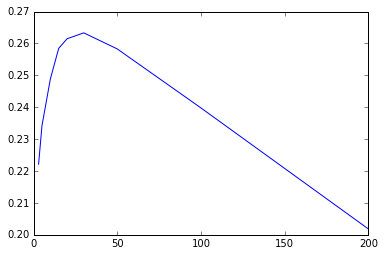

In [102]:
plt.plot(d,e)

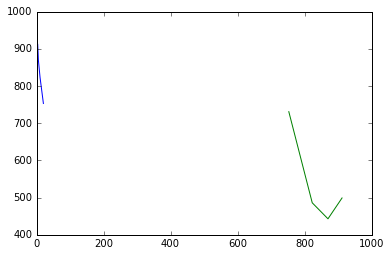

In [127]:
d=[3,5,10,20]
e=[]
f=[]
for i in d:
    r=test(i,1,0)[1]
    e.append(numpy.count_nonzero(r))
    f.append(max(r))
plt.plot(d,e)
plt.plot(e,f)

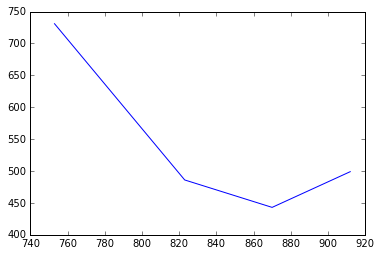

In [129]:
plt.plot(e,f)

In [131]:
d=[0,0.25,0.5,.75,1.]
e=[0,0.25,0.5,.75,1.]
#d=[0,0.5,1]
#e=[0,0.5,1]
f=[]
g=[]
for i in d:
    k=[]
    l=[]
    for j in e:
        if 1-i-j>=0:
            r=test(3,i,j)[1]
            k.append(numpy.count_nonzero(r))
            l.append(max(r))
        else:
            k.append(0)
            l.append(0)
    f.append(k)
    g.append(l)
print f

[[438, 279, 262, 259, 249], [791, 337, 288, 255, 0], [832, 414, 311, 0, 0], [855, 519, 0, 0, 0], [885, 0, 0, 0, 0]]


In [132]:
g

[[1679.0, 1712.0, 2248.0, 2169.0, 2128.0],
 [1109.0, 1635.0, 2205.0, 2206.0, 0],
 [723.0, 1499.0, 1890.0, 0, 0],
 [409.0, 1316.0, 0, 0, 0],
 [551.0, 0, 0, 0, 0]]

In [ ]:
for i in d:
    e.append(numpy.std(test(i,0.33,0.33)[2]))

In [108]:
def test(n,alpha,beta):
    resultsTen=zeros(len(a))
    weightTen=zeros(len(a))
    results=zeros(len(a))
    for i in range(500):
        recs=copacetic(n,alpha,beta)
        for i in range(len(recs)):
            if i<10:
                resultsTen[recs[i]]+=10-i
                weightTen[recs[i]]+=1
            #results[recs[i]]+=1189-i
    return [weightTen,resultsTen,map(lambda x: x/(500*1189.),results)]
		
def copacetic(n,alpha,beta):
	games=sample(range(1189),n)
	ratings=[choice(range(5,11)) for i in range(n)]
	game_row=[0 for i in range(1189)]
	rating_row=[0 for i in range(1189)]
	#print len(game_row)
	for i in range(len(games)):
		#game_row[games[i]]=1
		rating_row[games[i]]=ratings[i]
	owner = ownership_recs(rating_row,itemSim)
	rating = getRecs(rating_row)
	game = ownership_recs(rating_row,gameSim)
	new = (alpha*array(owner/max(owner)))+(beta*array(rating/max(rating)))+((1-alpha-beta)*array(game/max(game)))
	#print max(new)
	new[399]=0
	new[443]=0
	new[504]=0
	for i in games:
		new[i] = 0
	new=new/max(new)
	newkeys=sorted(range(len(new)), key=lambda x: new[x])[-20:]
	return newkeys[::-1]
		
		
def ownership_recs(user,recs):
	totals=dot(user,recs)
	simssum=dot(map(lambda x: 1 if x>0 else 0,user),recs)
	rankings=[totals[i]/simssum[i] for i in range(len(totals))]
	del totals,simssum
	return rankings

def tanimotoSimilarity(user1,user2): #tanimoto
    a=float(dot(user1,user2))/(dot(user1,user1)+dot(user2,user2)-dot(user1,user2))
    if sum(user1)==0 or sum(user2)==0: a = 0
    return a

def cosineSimilarity(user1,user2):
    #user1=map(lambda x: 0 if x==None else x, user1)
   # user2=map(lambda x: 0 if x==None else x, user2)
    a= float(dot(user1,user2))
    if sum(user1)==0 or sum(user2)==0: a = 0
    return a

def getRecs(user):
	#sims=[similarity(user,i) for i in recs]
	totals = dot(user,a)
	simssum= dot(user,aMasked)
	rankings=[totals[i]/simssum[i] for i in range(len(totals))]
	del totals,simssum
	return rankings

In [133]:
games2[1]

NameError: name 'games2' is not defined